In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import cluster
import os

In [48]:
# Load csv file 
df = pd.read_csv('./preprocessed_data/norm_data_standardized.csv', index_col=False)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,2.0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,2.0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,2.0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0


In [49]:
df.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,-0.503505,-0.699494,-0.742767,-0.632794,-0.097558,-0.420693,-0.999756,-0.611387,-0.343666,2.0
695,-0.858651,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.999756,-0.611387,-0.343666,2.0
696,0.206788,2.249915,2.285586,0.067638,1.708882,-0.145609,1.871021,2.335921,0.239398,4.0
697,-0.148359,1.594490,0.939651,0.417854,-0.097558,0.129474,2.691243,1.026006,-0.343666,4.0
698,-0.148359,1.594490,1.612618,0.768071,0.354052,0.404558,2.691243,0.371049,-0.343666,4.0


In [50]:
df.Class=[1 if each==4.0 else 0 for each in df.Class]
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,0


In [51]:
X = df.drop(['Class'],axis=1)
y = df['Class'] 
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

In [52]:
X.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,1.917875e-16,1.486651e-16,-9.529811e-18,4.181999e-16,1.874990e-16,1.391352e-15,-1.397706e-16,7.048090e-16,-1.318291e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213798e+00,-6.994942e-01,-7.427672e-01,-6.327940e-01,-1.000778e+00,-6.957763e-01,-9.997556e-01,-6.113872e-01,-3.436657e-01
25%,-8.586514e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.957763e-01,-5.896446e-01,-6.113872e-01,-3.436657e-01
50%,-1.483587e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.957763e-01,-1.795336e-01,-6.113872e-01,-3.436657e-01
75%,5.619340e-01,6.113541e-01,6.031674e-01,4.178545e-01,3.540519e-01,6.796412e-01,6.406884e-01,3.710488e-01,-3.436657e-01
max,1.982519e+00,2.249915e+00,2.285586e+00,2.519152e+00,3.063712e+00,1.779975e+00,2.691243e+00,2.335921e+00,4.903909e+00


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    float64
 1   Uniformity of Cell Size      699 non-null    float64
 2   Uniformity of Cell Shape     699 non-null    float64
 3   Marginal Adhesion            699 non-null    float64
 4   Single Epithelial Cell Size  699 non-null    float64
 5   Bare Nuclei                  699 non-null    float64
 6   Bland Chromatin              699 non-null    float64
 7   Normal Nucleoli              699 non-null    float64
 8   Mitoses                      699 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


In [8]:
# Initialise centroids
def initialize_centroids(X,K):
    
    #Randomize Traininng inidcies
    randomized_X = np.random.permutation(X.shape[0])
    
    #Get the training cluster indicies for number of clusters
    centroid_indx = randomized_X[:K]

    centroids = X[centroid_indx]
    
    return centroids

In [9]:
# Assign points to centroids
def assign_points_centroids(X,centroids):
    #Expand X dimensions in order to get correct shapes
    X = np.expand_dims(X,axis=1)
    #Calculate the norm
    distance = np.linalg.norm((X - centroids),axis=-1)
    #assign clusters to points that minimize our cost
    points = np.argmin(distance, axis=1)
    return points

In [10]:
# Compute mean
def compute_mean(X,points,K):
    #Intialize empty array to store our centroids
    centroids = np.zeros((K, X.shape[1]))
    
    #Iterate over each cluster and assign it to the mean of it's points
    for i in range(K):
        centroid_mean = X[points ==i].mean(axis=0)
        centroids[i] = centroid_mean
    return centroids

In [11]:
# Run k-means
def KMeans(X, K, iterations=10):
    
    #Initialize centroids
    centroids= initialize_centroids(X, K) 
    
    #Iterate for specified iterations
    for i in range(iterations):
        
        points = assign_points_centroids(X, centroids)#get points assigned to each cluster

        centroids = compute_mean(X, points, K) #update the centroids to the mean of it's points

    return centroids,points

In [54]:
X = X.values
K = 2
centroids, points = KMeans(X, K, 10000)

In [55]:
points

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [56]:
n = y.to_numpy()
n

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [57]:
centroids

array([[-0.49212215, -0.60216087, -0.59393786, -0.51381033, -0.50767403,
        -0.56470021, -0.53443732, -0.52951757, -0.30379808],
       [ 0.99702669,  1.21996229,  1.20330268,  1.04096639,  1.0285344 ,
         1.14406795,  1.08275613,  1.07278884,  0.61548701]])

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y,points)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       458
           1       0.95      0.91      0.93       241

    accuracy                           0.95       699
   macro avg       0.95      0.94      0.95       699
weighted avg       0.95      0.95      0.95       699



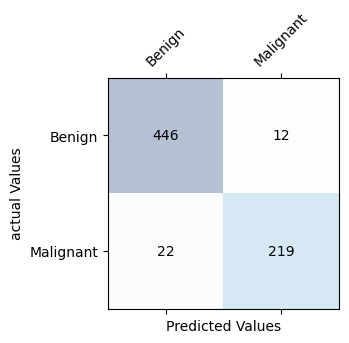

In [59]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["Benign", "Malignant"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y, points))

In [60]:
x1 = X[points == 0, 0]
x2 = X[points == 0, 1]

In [64]:
# Evaluation
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[points == 0, 0], y=X[points == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Cluster 1'
))

fig.add_trace(go.Scatter(
    x=X[points == 1, 0], y=X[points == 1, 1],
    mode='markers',marker_color='#7CFC00',name='Cluster 2'
))


fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='black',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='seaborn',width=1000, height=500,)